# Team Members

- Harsh Mehta _(hdm564)_
- Dipali Pandey _(dp33957)_
- Rohitashwa Chakraborty _(rc47878)_

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
import yfinance as yf
from datetime import datetime

%matplotlib inline
plt.style.use("bmh")

# Inputs

## Hard-coded Inputs

In [96]:
stocks = "AAPL".split()
market = "^GSPC"
tbonds = "^IRX"
start = pd.to_datetime("2000-01-01")
# end = pd.to_datetime("2020-01-01")
end = pd.to_datetime(datetime.now().date())
period = "1d"

## User Inputs

Please Uncomment to provide Input

In [97]:
# stocks = str(input("Space separated Stock Ticker(s):")).upper().split()
# market = str(input("market Ticker: ")).upper()
# tbonds = str(input("tbonds Ticker: ")).upper()

# start = pd.to_datetime(input("Start Date: "))
# end = pd.to_datetime(input("End Date: "))

# period = str(input("Frequency:"))

## Selected Inputs

In [98]:
print("Selected stock tickers:", stocks)
print("market Ticker: ",market)
print("tbonds Ticker: ",tbonds)
print("Start Date: ",start)
print("End Date: ",end)
print("Frequency:", period)

Selected stock tickers: ['AAPL']
market Ticker:  ^GSPC
tbonds Ticker:  ^IRX
Start Date:  2000-01-01 00:00:00
End Date:  2021-10-26 00:00:00
Frequency: 1d


# Yahoo

In [99]:
try:
    tickers_list = stocks+[market]+ [tbonds]
    data = yf.download(tickers= tickers_list, start=start, end=end, interval=period)["Adj Close"].fillna(method="ffill")
    data[stocks+[market]] = data[stocks+[market]].pct_change()
    data.dropna(inplace = True)
except:
    print("Wrong Inputs. Please try again")

[*********************100%***********************]  3 of 3 completed


In [100]:
data = data.apply(lambda row: (row[:-1]-(row[tbonds]/100)), axis = 1) # Converting bips to %age
data.rename({market:"MRKT"}, axis=1, inplace=True)
data.head()

,AAPL,MRKT
Date,,
2000-01-04,-0.137010,-0.091045
2000-01-05,-0.038067,-0.050778
2000-01-06,-0.138938,-0.051444
2000-01-07,-0.004831,-0.025110
2000-01-10,-0.069888,-0.041110


# Regression

In [101]:
def plot_graph(ticker, X, y, params):
    '''
        Function to print the plots
    '''
    plt.figure(figsize=(10,7))
    plt.scatter(X["MRKT"], y, label = item)
    plt.legend()
    plt.xlabel("Systemic Risk")
    plt.ylabel("Risk Premium")
    plt.title("Security Characteristics Line Regression: "+item)
    plt.axhline(y=0, color='k', linewidth = 0.7)
    plt.axvline(x=0, color='k', linewidth = 0.7)

    f_x = np.dot(X,np.asarray(params))
    plt.plot(X["MRKT"],f_x, color = "red", linestyle = "dashed", linewidth = 0.7)

AAPL ~ MRKT
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     6372.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:42:37   Log-Likelihood:                 13406.
No. Observations:                5488   AIC:                        -2.681e+04
Df Residuals:                    5486   BIC:                        -2.679e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.000      4.

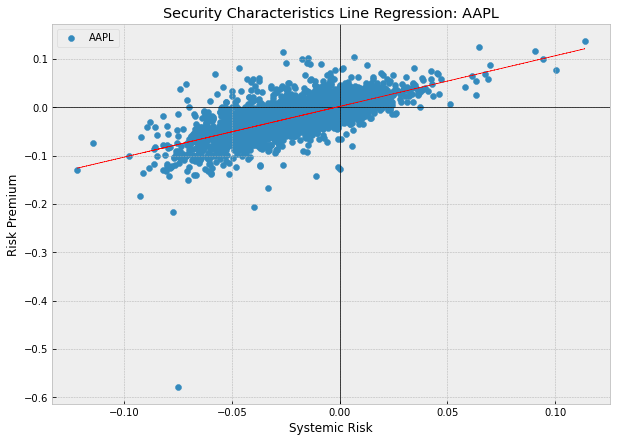

In [102]:
for item in stocks:
    formula = item+' ~ MRKT'
    print(formula)
    y, X = dmatrices(formula, data=data, return_type= "dataframe")
    model = sm.OLS(y, X)
    result = model.fit()
    print(result.summary(),end="\n––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––\n\n")
    
    # print("T-test")
    # hypotheses = 'Intercept = 0, MRKT = 0'
    # print(result.t_test(hypotheses),end="\n––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––\n\n")
    
    plot_graph(item, X, y, result.params)

Market $\beta$ is statistiscally significantly different from 0, and is equal to 1.049

$\alpha$ is approximately equal to zero

***
***